In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Paths to the datasets
files = {
    "2-wayEpi_100feat": "/content/2-wayEpi_100feat.txt",
    "4-wayAdditive_100feat": "/content/4-wayAdditive_100feat.txt",
    "4-wayHeterogeneous_100feat": "/content/4-wayHeterogeneous_100feat.txt",
    "2Additive_2-wayEpi": "/content/2Additive_2-wayEpi_100feat.txt"  # Adjust the path as necessary
}

# Load the datasets
datasets = {name: pd.read_csv(path, delimiter='\t') for name, path in files.items()}


In [ ]:
for name, data in datasets.items():
    print(f"Processing {name}:")
    # Check for missing values
    if data.isnull().sum().sum() > 0:
        data = data.fillna(data.mean())  # Fill missing values if necessary

    # You might need to encode categorical variables, normalize data, etc.
    print(data.describe())


Processing 2-wayEpi_100feat:
                N0           N1           N2          N3           N4  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean      0.349000     0.731000     0.101000     0.87300     0.843000   
std       0.538041     0.664139     0.308049     0.71511     0.691975   
min       0.000000     0.000000     0.000000     0.00000     0.000000   
25%       0.000000     0.000000     0.000000     0.00000     0.000000   
50%       0.000000     1.000000     0.000000     1.00000     1.000000   
75%       1.000000     1.000000     0.000000     1.00000     1.000000   
max       2.000000     2.000000     2.000000     2.00000     2.000000   

                N5           N6           N7          N8           N9  ...  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000  ...   
mean      0.907000     0.419000     0.633000     0.18500     0.715000  ...   
std       0.706293     0.594805     0.659353     0.41827     0.684283  ...   
m

In [ ]:
!pip install biopython

CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGCAGCCAGACTGCCTTCCGGGTCACTGCCATGGAGGAGCCGCAGTCAGATCCTAGCGTCGAGCCCCCTCTGAGTCAGGAAACATTTTCAGACCTATGGAAACTACTTCCTGAAAACAACGTTCTGTCCCCCTTGCCGTCCCAAGCAATGGATGATTTGATGCTGTCCCCGGACGATATTGAACAATGGTTCACTGAAGACCCAGGTCCAGATGAAGCTCCCAGAATGCCAGAGGCTGCTCCCCCCGTGGCCCCTGCACCAGCAGCTCCTACACCGGCGGCCCCTGCACCAGCCCCCTCCTGGCCCCTGTCATCTTCTGTCCCTTCCCAGAAAACCTACCAGGGCAGCTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAGCCAAGTCTGTGACTTGCACGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCCTGTGCAGCTGTGGGTTGATTCCACACCCCCGCCCGGCACCCGCGTCCGCGCCATGGCCATCTACAAGCAGTCACAGCACATGACGGAGGTTGTGAGGCGCTGCCCCCACCATGAGCGCTGCTCAGATAGCGATGGTCTGGCCCCTCCTCAGCATCTTATCCGAGTGGAAGGAAATTTGCGTGTGGAGTATTTGGATGACAGAAACACTTTTCGACATAGTGTGGTGGTGCCCTATGAGCCGCCTGAGGTTGGCTCTGACTGTACCACCATCCACTACAACTACATGTGTAACAGTTCCTGCATGGGCGGCATGAACCGGAGGCCCATCCTCACCATCATCACACTGGAAGACTCCAGTGGTAATCTACTGGGACGGAACAGCTTTGAGGTGCGTGTTTGTGCCTGTCCTGGGAGAGACCGGCGCACAGAGGAA

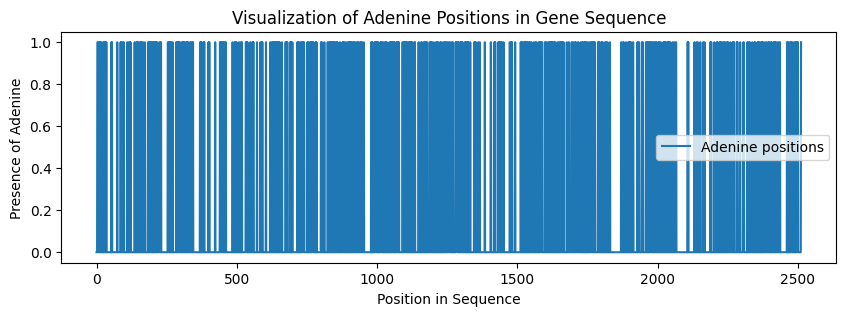

In [ ]:
from Bio import Entrez
from Bio import SeqIO

# Always provide your email
Entrez.email = "skarusala1@toromail.csudh.edu"

# Fetch the gene data
handle = Entrez.efetch(db="nucleotide", id="NM_000546", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()

# Print the gene sequence or part of it as an example
print(record.seq)

# Example of plotting a simple feature from the gene
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(range(len(record.seq)), [1 if nuc == 'A' else 0 for nuc in record.seq], label='Adenine positions')
plt.legend()
plt.title('Visualization of Adenine Positions in Gene Sequence')
plt.xlabel('Position in Sequence')
plt.ylabel('Presence of Adenine')
plt.show()


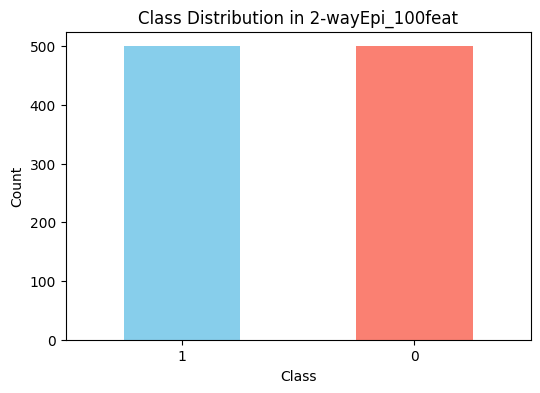

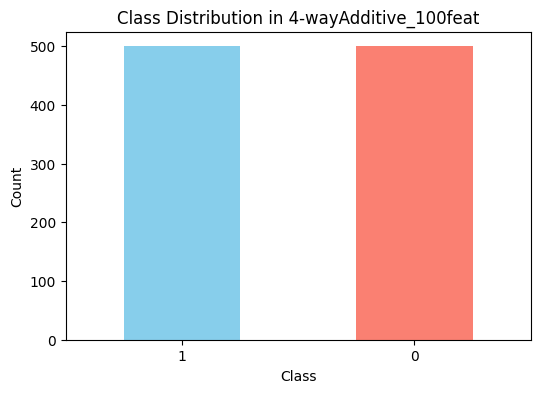

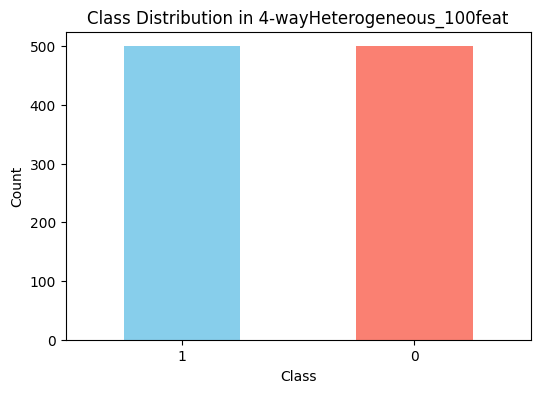

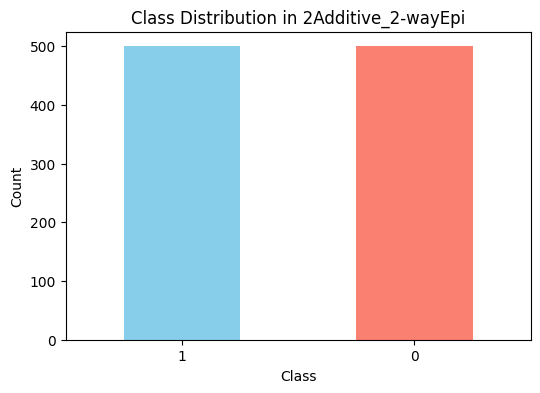

In [ ]:
import matplotlib.pyplot as plt

for name, data in datasets.items():
    plt.figure(figsize=(6, 4))
    data['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f'Class Distribution in {name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


# **Principle Componenet Analysis**

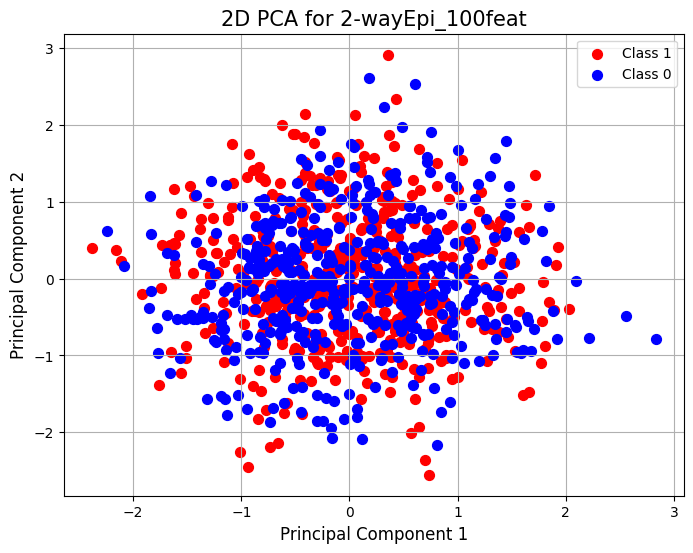

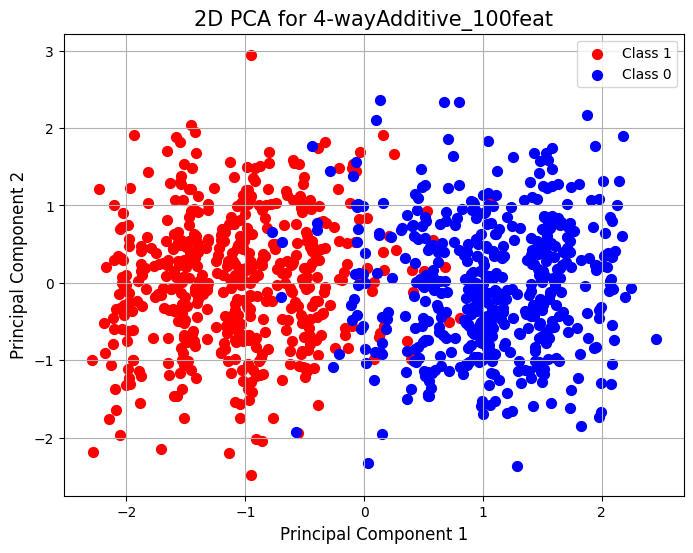

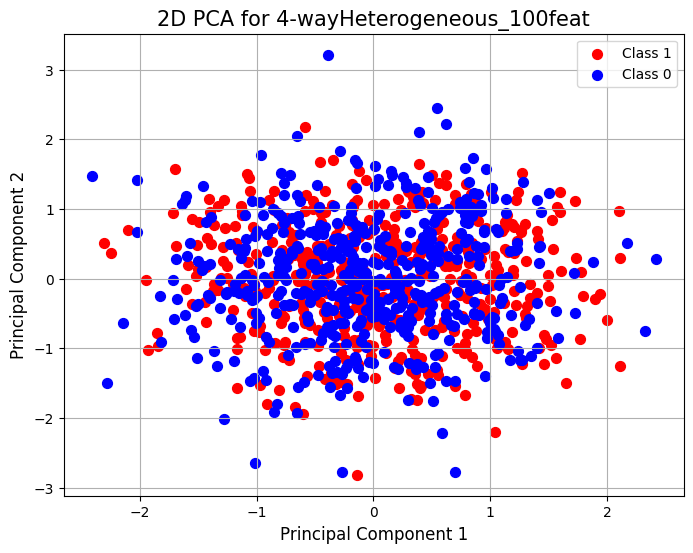

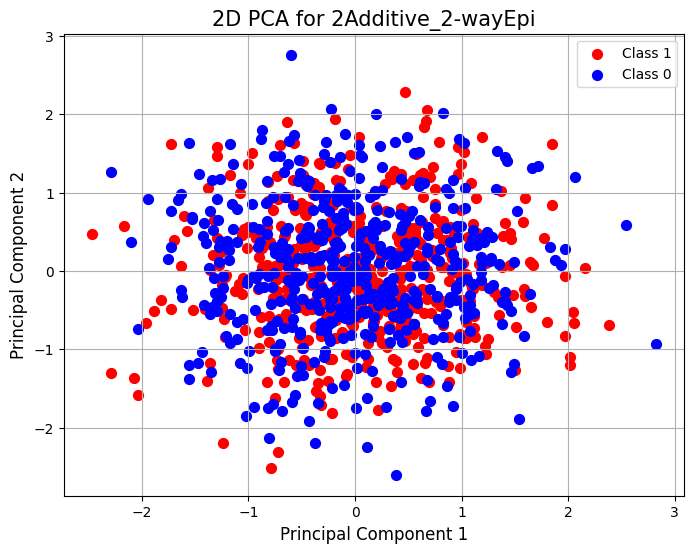

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Assuming datasets is a dictionary of DataFrames
for name, data in datasets.items():
    # Apply PCA with 40 components
    pca = PCA(n_components=40)
    features = data.drop('Class', axis=1)  # Assume 'Class' is the target variable
    principalComponents = pca.fit_transform(features)

    # Create a DataFrame for all 40 principal components
    principalDf = pd.DataFrame(data=principalComponents, columns=[f'Principal Component {i+1}' for i in range(40)])

    # Create a DataFrame that includes only the first two principal components for visualization
    principalDfForPlot = principalDf.iloc[:, :2]

    # Combine the first two principal components with the class labels for plotting
    finalDf = pd.concat([principalDfForPlot, data[['Class']]], axis=1)

    # Create a figure for plotting the first two principal components
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Principal Component 1', fontsize=12)
    ax.set_ylabel('Principal Component 2', fontsize=12)
    ax.set_title(f'2D PCA for {name}', fontsize=15)

    # Set colors and plot each class
    targets = data['Class'].unique()  # Use unique class labels from the data
    colors = ['r', 'b']  # Define more colors if there are more than two classes

    for target, color in zip(targets, colors):
        indicesToKeep = finalDf['Class'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1'],
                   finalDf.loc[indicesToKeep, 'Principal Component 2'],
                   c=color,
                   s=50,
                   label=f'Class {target}')

    ax.legend()
    ax.grid()
    plt.show()


# **Preparing Data and Training on XGBOOST**

In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


Results for 2-wayEpi_100feat:
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Results for {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 0.8}
Average Accuracy: 1.0
Average Precision: 1.0
Average Recall: 1.0
Average F1 Score: 1.0


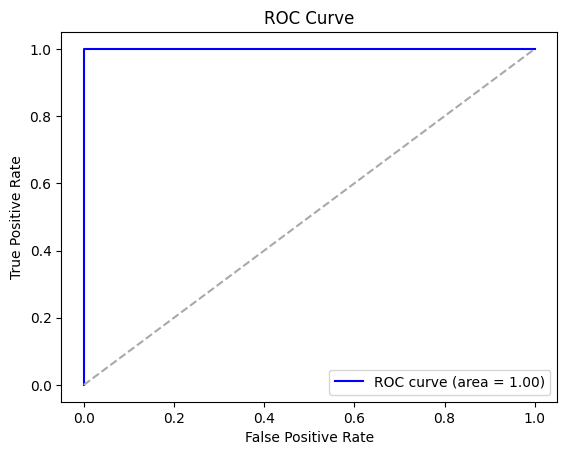

Results for 4-wayAdditive_100feat:
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Results for {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.6}
Average Accuracy: 0.96
Average Precision: 0.960146491272566
Average Recall: 0.96
Average F1 Score: 0.9599965994498891


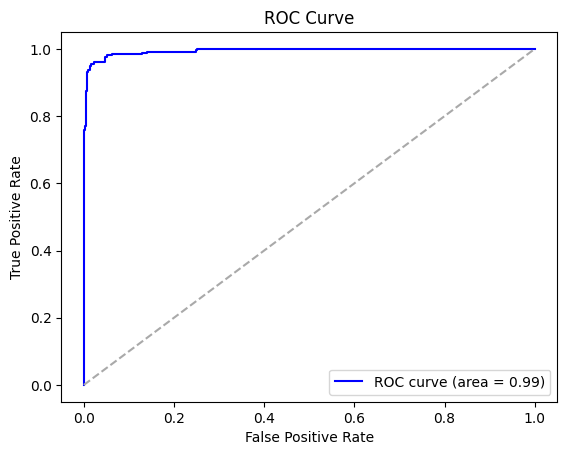

Results for 4-wayHeterogeneous_100feat:
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Results for {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.8}
Average Accuracy: 0.704
Average Precision: 0.7576631614346001
Average Recall: 0.704
Average F1 Score: 0.6870381692964249


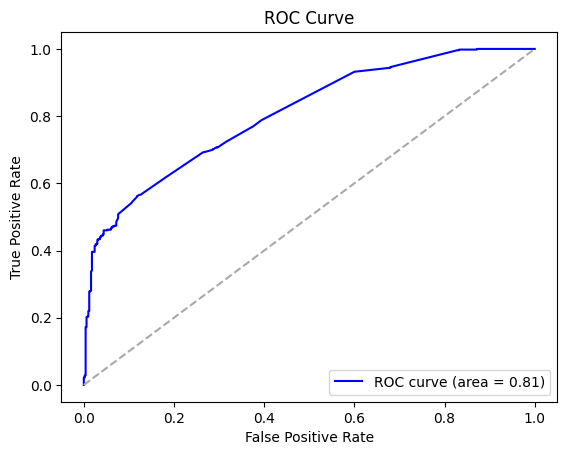

Results for 2Additive_2-wayEpi:
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Results for {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 1.0}
Average Accuracy: 1.0
Average Precision: 1.0
Average Recall: 1.0
Average F1 Score: 1.0


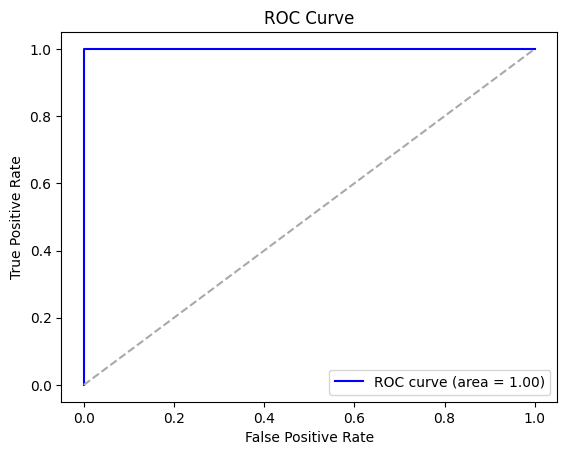

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

def train_model_xgb(df):
    # Split data into features and target
    X = df.drop(columns=['Class'])
    y = df['Class']

    # Setup cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # More folds for a more robust validation

    # Define XGBoost model parameters to be tuned
    param_grid = {
        'max_depth': [3, 5, 7],  # Depths of the tree
        'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (hessian) needed in a child
        'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
        'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
        'learning_rate': [0.01, 0.1, 0.2]  # Step size shrinkage used in update to prevent overfitting
    }

    # Initialize the XGBoost classifier
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', seed=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=skf, verbose=1)

    # Fit GridSearchCV
    grid_search.fit(X, y)

    # Best model
    best_model = grid_search.best_estimator_

    # Cross-validation by StratifiedKFold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    true_labels = []
    predicted_probabilities = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Predict on the testing data using the best model
        y_pred = best_model.predict(X_test)
        y_probs = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

        # Calculate and collect metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='macro'))
        recalls.append(recall_score(y_test, y_pred, average='macro'))
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))
        true_labels.extend(y_test)
        predicted_probabilities.extend(y_probs)

    # Output the average of the collected metrics
    print(f"Results for {grid_search.best_params_}")
    print("Average Accuracy:", sum(accuracies) / len(accuracies))
    print("Average Precision:", sum(precisions) / len(precisions))
    print("Average Recall:", sum(recalls) / len(recalls))
    print("Average F1 Score:", sum(f1_scores) / len(f1_scores))

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
datasets = {name: pd.read_csv(path, delimiter='\t') for name, path in files.items()}
for name, data in datasets.items():
    print(f"Results for {name}:")
    train_model_xgb(data)


# **METHOD 2: USING GAN'S**

In [ ]:
pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torch
from torch import nn

class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, output_dim),
            nn.Tanh()  # Tanh is used to normalize outputs between -1 and 1
        )

    def forward(self, x):
        return self.net(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Sigmoid to output a probability
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

# Define a function to load and preprocess data
def load_and_preprocess_data(files):
    datasets = {}
    for name, path in files.items():
        df = pd.read_csv(path, delimiter='\t')
        X = df.values

        scaler = MinMaxScaler(feature_range=(-1, 1))
        X_scaled = scaler.fit_transform(X)

        tensor_x = torch.Tensor(X_scaled)  # convert to torch tensor
        dataset = TensorDataset(tensor_x)  # create dataset
        dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
        datasets[name] = dataloader
    return datasets

# Load and preprocess datasets
dataloaders = load_and_preprocess_data(files)


In [ ]:
def train_gan(dataloaders, input_dim=100):
    results = {}
    for name, dataloader in dataloaders.items():
        print(f"Training GAN for {name}")

        generator = Generator(input_dim, dataloader.dataset.tensors[0].shape[1])
        discriminator = Discriminator(dataloader.dataset.tensors[0].shape[1])

        optimizer_g = torch.optim.Adam(generator.parameters(), lr=0.0002)
        optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=0.0002)
        criterion = nn.BCELoss()

        epochs = 50
        for epoch in range(epochs):
            for data in dataloader:
                # Update discriminator
                real_data = data[0]
                batch_size = real_data.size(0)
                label_real = torch.ones(batch_size, 1)
                label_fake = torch.zeros(batch_size, 1)

                noise = torch.randn(batch_size, input_dim)
                fake_data = generator(noise)

                discriminator.zero_grad()
                output_real = discriminator(real_data)
                output_fake = discriminator(fake_data.detach())
                loss_real = criterion(output_real, label_real)
                loss_fake = criterion(output_fake, label_fake)
                loss_d = (loss_real + loss_fake) / 2
                loss_d.backward()
                optimizer_d.step()

                # Update generator
                generator.zero_grad()
                output_fake = discriminator(fake_data)
                loss_g = criterion(output_fake, label_real)
                loss_g.backward()
                optimizer_g.step()

            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Loss D = {loss_d.item()}, Loss G = {loss_g.item()}")

        results[name] = (generator, discriminator)
    return results

# Train GANs on each dataset
gan_models = train_gan(dataloaders)


Training GAN for 2-wayEpi_100feat
Epoch 0: Loss D = 0.5545490980148315, Loss G = 0.5321615934371948
Epoch 10: Loss D = 0.5505766868591309, Loss G = 0.7306711673736572
Epoch 20: Loss D = 0.46549129486083984, Loss G = 1.2548097372055054
Epoch 30: Loss D = 0.6009547710418701, Loss G = 1.0337938070297241
Epoch 40: Loss D = 0.618224561214447, Loss G = 0.9074777364730835
Training GAN for 4-wayAdditive_100feat
Epoch 0: Loss D = 0.6115689873695374, Loss G = 0.5405066609382629
Epoch 10: Loss D = 0.5065088868141174, Loss G = 0.837963342666626
Epoch 20: Loss D = 0.5034967660903931, Loss G = 0.8331581950187683
Epoch 30: Loss D = 0.5176934003829956, Loss G = 1.1057486534118652
Epoch 40: Loss D = 0.5233475565910339, Loss G = 1.0204488039016724
Training GAN for 4-wayHeterogeneous_100feat
Epoch 0: Loss D = 0.5745529532432556, Loss G = 0.5054481625556946
Epoch 10: Loss D = 0.5125321745872498, Loss G = 0.8692413568496704
Epoch 20: Loss D = 0.5919943451881409, Loss G = 1.0940096378326416
Epoch 30: Loss D

In [ ]:
import torch

def generate_samples(generator, num_samples, input_dim):
    """
    Generate samples using the trained generator of a GAN.

    Parameters:
    - generator (torch.nn.Module): The trained generator model.
    - num_samples (int): Number of samples to generate.
    - input_dim (int): Dimension of the input noise vector.

    Returns:
    - numpy.ndarray: Generated data samples.
    """
    # Create random noise
    noise = torch.randn(num_samples, input_dim)

    # Generate data
    generator.eval()  # Set the generator to evaluation mode
    with torch.no_grad():  # No need to track gradients
        generated_data = generator(noise).cpu().numpy()  # Assuming generator outputs torch.Tensor

    return generated_data

# Example of generating data
num_samples = 100  # Number of synthetic samples you want to generate
input_dim = 100  # The dimensionality of the input noise vector
generator_model = gan_models['2-wayEpi_100feat'][0]  # Replace with your generator if named differently

# Generate samples
synthetic_data = generate_samples(generator_model, num_samples, input_dim)

# You can now use `synthetic_data` as you wish, such as saving it or using it for further analysis
print(synthetic_data.shape)


(100, 101)


# **Model Evaluation**

In [ ]:
    # Detailed classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, predictions))


Classification Report for 2Additive_2-wayEpi:

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       104
           1       0.58      0.67      0.62        96

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.61      0.61      0.61       200



# **Visualizations**

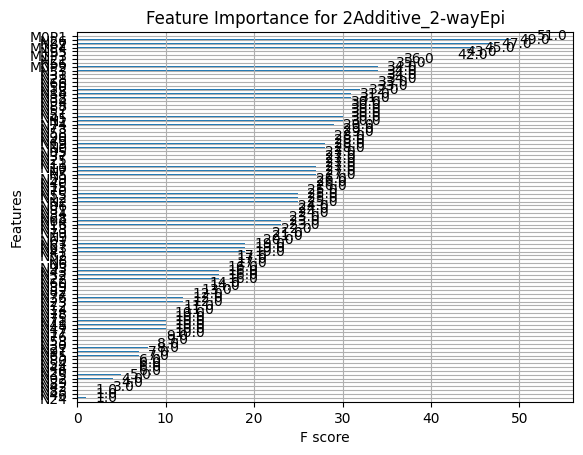

In [ ]:
    xgb.plot_importance(model)
    plt.title(f'Feature Importance for {name}')
    plt.show()


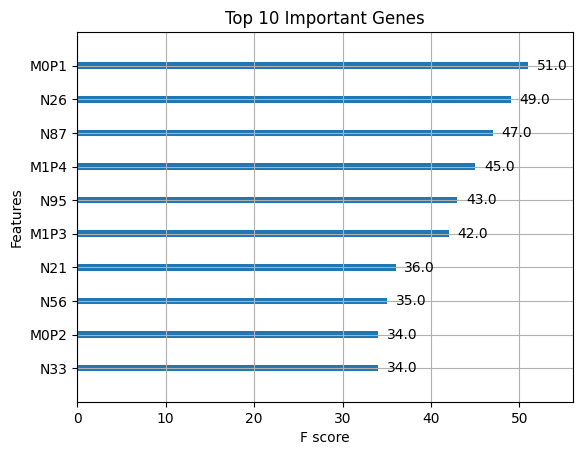

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming 'model' is your trained XGBoost model
xgb.plot_importance(model, max_num_features=10)  # Show top 10 features
plt.title('Top 10 Important Genes')
plt.show()


0:[N87<1] yes=1,no=2,missing=2
	1:[N85<1] yes=3,no=4,missing=4
		3:[N14<1] yes=7,no=8,missing=8
			7:[N18<2] yes=15,no=16,missing=16
				15:[N31<1] yes=31,no=32,missing=32
					31:[N72<1] yes=55,no=56,missing=56
						55:leaf=0.379468679
						56:leaf=-0.0583672561
					32:[N25<2] yes=57,no=58,missing=58
						57:leaf=-0.00542892795
						58:leaf=0.370527923
				16:leaf=-0.204013512
			8:[N56<1] yes=17,no=18,missing=18
				17:[N19<1] yes=33,no=34,missing=34
					33:leaf=-0.167465121
					34:leaf=0.396026522
				18:[N74<1] yes=35,no=36,missing=36
					35:leaf=0.0633369386
					36:leaf=-0.364426643
		4:[N42<1] yes=9,no=10,missing=10
			9:[N94<2] yes=19,no=20,missing=20
				19:[N64<1] yes=37,no=38,missing=38
					37:[N95<1] yes=59,no=60,missing=60
						59:leaf=0.202172652
						60:leaf=-0.0582158007
					38:[N15<2] yes=61,no=62,missing=62
						61:leaf=-0.262480259
						62:leaf=0.196677685
				20:[N15<1] yes=39,no=40,missing=40
					39:leaf=0.396026522
					40:leaf=0.0633369386
			10:[N

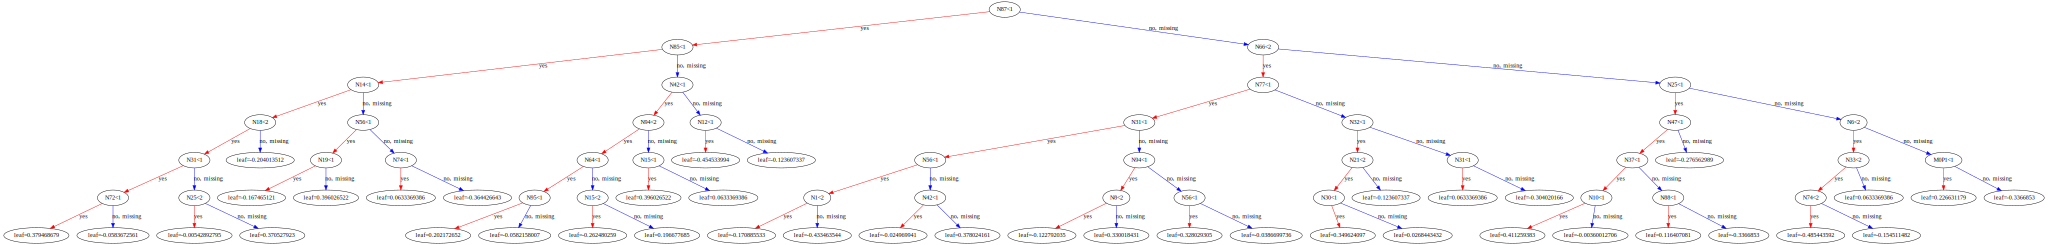

In [ ]:
# Visualize a single decision tree from the XGBoost ensemble
booster = model.get_booster()
tree = booster.get_dump()[0]  # Get the first tree
print(tree)  # Prints the tree in text format

# Optionally, plot using graphviz if you need a graphical representation
import graphviz
xgb.to_graphviz(booster, num_trees=0)



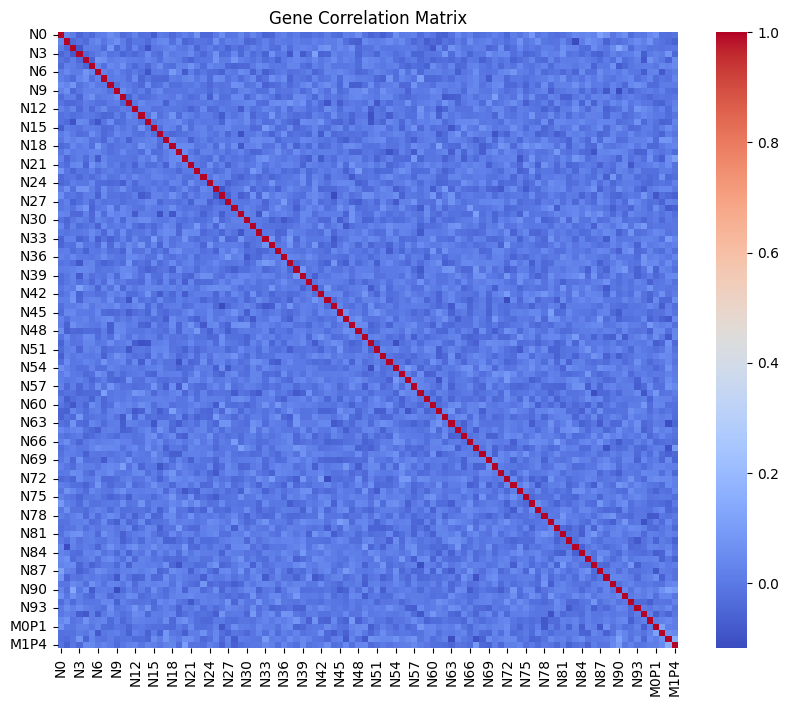

In [ ]:
import seaborn as sns

# Compute correlations
corr = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Gene Correlation Matrix')
plt.show()


# **Fine-Tuning the Model**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=3, scoring='accuracy')
clf.fit(X_train, y_train)

print(f"Best parameters for {name}: ", clf.best_params_)
print(f"Best score for {name}: ", clf.best_score_)


Best parameters for 2Additive_2-wayEpi:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score for 2Additive_2-wayEpi:  0.6724536059249248


# **Predctions**

In [ ]:
# Assuming X_test and y_test are your features and labels from the test split

# Predict class labels
predicted_classes = model.predict(X_test)

# Optionally, predict probabilities for binary classification
predicted_probabilities = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print out the predictions
print("Predicted classes:", predicted_classes)
print("Predicted probabilities:", predicted_probabilities)

# Evaluate the predictions
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, predicted_classes))
print(classification_report(y_test, predicted_classes))


Predicted classes: [0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0
 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1
 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1]
Predicted probabilities: [0.06625672 0.6758327  0.03884909 0.40653935 0.66608167 0.20700105
 0.08684804 0.9482523  0.5193733  0.83397245 0.7048083  0.8252904
 0.34724554 0.46511522 0.07963394 0.8158127  0.57412344 0.06425388
 0.13630265 0.64723283 0.8042377  0.47470602 0.13340567 0.6414655
 0.29587692 0.8379897  0.5225949  0.21880578 0.4975545  0.42556316
 0.46960407 0.72268015 0.35885563 0.48074678 0.9867541  0.9314482
 0.08201738 0.19540861 0.41482985 0.20150617 0.7470467  0.19730438
 0.63391954 0.91424316 0.97791004 0.64022946 0.4529184  0.02820819
 0.7745324  0.61

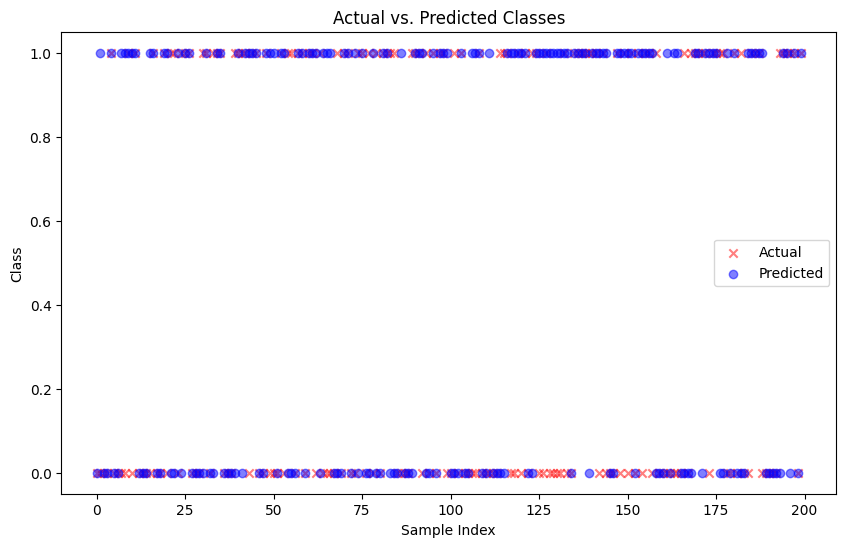

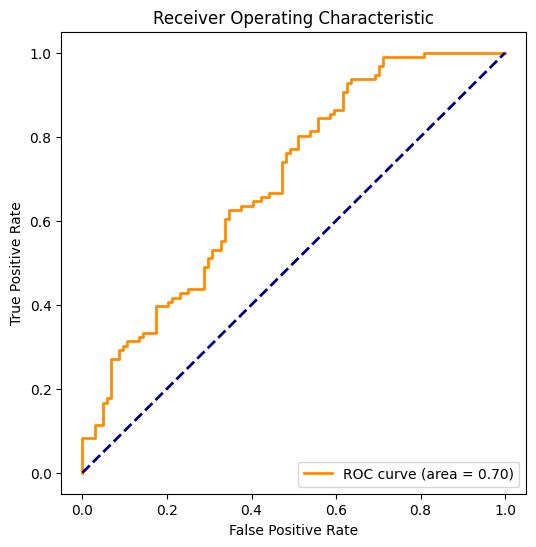

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting actual vs predicted for a binary classification
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(predicted_classes)), y_test, color='red', label='Actual', alpha=0.5, marker='x')
plt.scatter(np.arange(len(predicted_classes)), predicted_classes, color='blue', label='Predicted', alpha=0.5, marker='o')
plt.title('Actual vs. Predicted Classes')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
